In [2]:
import sklearn 
import keras

from sklearn import *
import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import *
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from keras.callbacks import *
import tensorflow as tf
#tf.enable_eager_execution()
#tf.set_random_seed(0)
#np.random.seed(0)

Using TensorFlow backend.


In [0]:
from keras import models
from keras.optimizers import SGD

from keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
num_instances =x_train.shape
print (x_test.shape)
print(num_instances)
nepochs=range(20)


11493376/11490434 [==============================] - 0s 0us/step
(10000, 28, 28)
(60000, 28, 28)


In [0]:


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=20, 
                      verbose=1, 
                      batch_size=50,  validation_split=0.3, shuffle=True
                      )


In [0]:
plt.figure()
plt.plot(nepochs, history.history['loss'], label = "train_loss")
plt.plot(nepochs, history.history['acc'], label = "train_acc")
plt.plot(nepochs, history.history['val_loss'], label = "val_loss")
plt.plot(nepochs, history.history['val_acc'], label = "val_acc")
plt.title("Training Loss and Accuracy [Epoch {}]")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.0912 - acc: 0.9806


[0.09122796299801411, 0.9806]

In [7]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)


model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=20, 
                      verbose=1, 
                      batch_size=2,  validation_split=0.3, shuffle=True)
                      


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 81s 2ms/sample - loss: 0.2898 - acc: 0.9158 - val_loss: 0.1634 - val_acc: 0.9538
Epoch 2/20
42000/42000 [==============================] - 79s 2ms/sample - loss: 0.1347 - acc: 0.9603 - val_loss: 0.1295 - val_acc: 0.9619
Epoch 3/20
42000/42000 [==============================] - 79s 2ms/sample - loss: 0.0946 - acc: 0.9721 - val_loss: 0.1032 - val_acc: 0.9694
Epoch 4/20
42000/42000 [==============================] - 82s 2ms/sample - loss: 0.0744 - acc: 0.9777 - val_loss: 0.0946 - val_acc: 0.9728
Epoch 5/20
42000/42000 [==============================] - 87s 2ms/sample - loss: 0.0578 - acc: 0.9830 - val_loss: 0.0853 - val_acc: 0.9752
Epoch 6/20
42000/42000 [==============================] - 85s 2ms/sample - loss: 0.0491 - acc: 0.9855 - val_loss: 0.0843 - val_acc: 0.9762
Epoch 7/20
42000/42000 [==============================] - 85s 2ms/sample - loss: 0.0416 - acc: 0.9875 - val_loss: 0.

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0633 - acc: 0.9817


[0.06326629450203182, 0.9817]

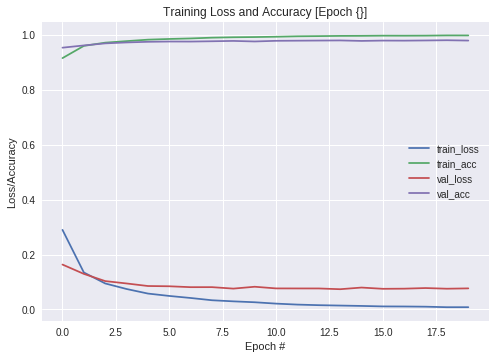

In [9]:
plt.figure()
plt.plot(nepochs, history.history['loss'], label = "train_loss")
plt.plot(nepochs, history.history['acc'], label = "train_acc")
plt.plot(nepochs, history.history['val_loss'], label = "val_loss")
plt.plot(nepochs, history.history['val_acc'], label = "val_acc")
plt.title("Training Loss and Accuracy [Epoch {}]")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


In [10]:
rms=keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08)
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=20, 
                      verbose=1, 
                      batch_size=50,  validation_split=0.3, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 8s 190us/sample - loss: 0.0243 - acc: 0.9914 - val_loss: 0.0926 - val_acc: 0.9769
Epoch 2/20
42000/42000 [==============================] - 8s 183us/sample - loss: 0.0237 - acc: 0.9922 - val_loss: 0.1052 - val_acc: 0.9767
Epoch 3/20
42000/42000 [==============================] - 8s 181us/sample - loss: 0.0219 - acc: 0.9927 - val_loss: 0.1057 - val_acc: 0.9776
Epoch 4/20
42000/42000 [==============================] - 8s 184us/sample - loss: 0.0184 - acc: 0.9938 - val_loss: 0.1106 - val_acc: 0.9783
Epoch 5/20
42000/42000 [==============================] - 8s 183us/sample - loss: 0.0174 - acc: 0.9944 - val_loss: 0.1095 - val_acc: 0.9772
Epoch 6/20
42000/42000 [==============================] - 8s 185us/sample - loss: 0.0155 - acc: 0.9945 - val_loss: 0.1120 - val_acc: 0.9776
Epoch 7/20
42000/42000 [==============================] - 8s 186us/sample - loss: 0.0129 - acc: 0.9956 - val_l

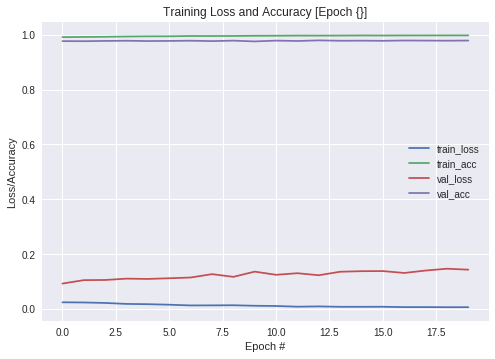

In [11]:
plt.figure()
plt.plot(nepochs, history.history['loss'], label = "train_loss")
plt.plot(nepochs, history.history['acc'], label = "train_acc")
plt.plot(nepochs, history.history['val_loss'], label = "val_loss")
plt.plot(nepochs, history.history['val_acc'], label = "val_acc")
plt.title("Training Loss and Accuracy [Epoch {}]")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
